In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mta_df = pd.read_csv("MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")

In [4]:
mta_df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference
0,08/28/2023 05:00:00 PM,K017,Central Av (M),BK,M,all,127,1,40.697857,-73.927400,POINT (-73.9274 40.697857)
1,08/28/2023 02:00:00 AM,N414,Flushing Av (G),BK,G,all,6,0,40.700380,-73.950230,POINT (-73.95023 40.70038)
2,08/28/2023 05:00:00 PM,R203,"Wall St (4,5)",M,"5,4",all,1713,0,40.707558,-74.011860,POINT (-74.01186 40.707558)
3,09/06/2022 09:00:00 PM,R252,103 St (6),M,6,all,85,0,40.790600,-73.947480,POINT (-73.94748 40.7906)
4,04/18/2022 10:00:00 AM,R252,103 St (6),M,6,all,309,6,40.790600,-73.947480,POINT (-73.94748 40.7906)
...,...,...,...,...,...,...,...,...,...,...,...
5711712,10/27/2022 06:00:00 AM,R419,Zerega Av (6),BX,6,all,188,0,40.836487,-73.847040,POINT (-73.84704 40.836487)
5711713,06/10/2023 07:00:00 PM,R523,Woodside-61 St (7),Q,7,all,469,13,40.745630,-73.902985,POINT (-73.902985 40.74563)
5711714,04/27/2022 02:00:00 AM,R419,Zerega Av (6),BX,6,all,1,0,40.836487,-73.847040,POINT (-73.84704 40.836487)
5711715,11/26/2022 09:00:00 PM,R419,Zerega Av (6),BX,6,all,17,0,40.836487,-73.847040,POINT (-73.84704 40.836487)


In [5]:
census_df = pd.read_csv("nyc_census_tracts.csv")

In [6]:
census_df

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,36085030302,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,...,8.4,12.0,53.8,8.9,35.1,0.9,0.0,1.3,46.6,6.2
2163,36085031901,Richmond,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,...,7.3,11.3,38.7,2.4,49.4,9.5,0.0,0.0,38.2,13.8
2164,36085031902,Richmond,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,...,6.1,7.1,44.9,7.2,44.5,0.5,0.0,2.7,40.9,9.4
2165,36085032300,Richmond,Staten Island,1131,597,534,45.5,24.0,29.7,0.0,...,2.8,15.2,53.6,8.8,32.8,4.9,0.0,0.0,52.5,10.7


In [7]:
mta_df.drop(["transfers","routes","latitude","longitude","Georeference","payment_method"],axis=1,inplace=True)

In [8]:
mta_df

,transit_timestamp,station_complex_id,station_complex,borough,ridership
0,08/28/2023 05:00:00 PM,K017,Central Av (M),BK,127
1,08/28/2023 02:00:00 AM,N414,Flushing Av (G),BK,6
2,08/28/2023 05:00:00 PM,R203,"Wall St (4,5)",M,1713
3,09/06/2022 09:00:00 PM,R252,103 St (6),M,85
4,04/18/2022 10:00:00 AM,R252,103 St (6),M,309
...,...,...,...,...,...
5711712,10/27/2022 06:00:00 AM,R419,Zerega Av (6),BX,188
5711713,06/10/2023 07:00:00 PM,R523,Woodside-61 St (7),Q,469
5711714,04/27/2022 02:00:00 AM,R419,Zerega Av (6),BX,1
5711715,11/26/2022 09:00:00 PM,R419,Zerega Av (6),BX,17


In [9]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711717 entries, 0 to 5711716
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   transit_timestamp   object
 1   station_complex_id  object
 2   station_complex     object
 3   borough             object
 4   ridership           int64 
dtypes: int64(1), object(4)
memory usage: 217.9+ MB


In [ ]:
mta_df["transit_timestamp"] = pd.to_datetime(mta_df["transit_timestamp"])

In [234]:
mta_df

,transit_timestamp,station_complex_id,station_complex,borough,ridership
0,2023-08-28 17:00:00,K017,Central Av (M),BK,127
1,2023-08-28 02:00:00,N414,Flushing Av (G),BK,6
2,2023-08-28 17:00:00,R203,"Wall St (4,5)",M,1713
3,2022-09-06 21:00:00,R252,103 St (6),M,85
4,2022-04-18 10:00:00,R252,103 St (6),M,309
...,...,...,...,...,...
5711712,2022-10-27 06:00:00,R419,Zerega Av (6),BX,188
5711713,2023-06-10 19:00:00,R523,Woodside-61 St (7),Q,469
5711714,2022-04-27 02:00:00,R419,Zerega Av (6),BX,1
5711715,2022-11-26 21:00:00,R419,Zerega Av (6),BX,17


In [ ]:
mta_df["date"] = mta_df['transit_timestamp'].dt.strftime("%d-%m-%y")
mta_df["time"] = mta_df["transit_timestamp"].dt.strftime("%H:%M")

In [12]:
mta_df

,transit_timestamp,station_complex_id,station_complex,borough,payment_method,ridership,date,time
0,2023-08-28 17:00:00,K017,Central Av (M),BK,all,127,28-08-23,17:00
1,2023-08-28 02:00:00,N414,Flushing Av (G),BK,all,6,28-08-23,02:00
2,2023-08-28 17:00:00,R203,"Wall St (4,5)",M,all,1713,28-08-23,17:00
3,2022-09-06 21:00:00,R252,103 St (6),M,all,85,06-09-22,21:00
4,2022-04-18 10:00:00,R252,103 St (6),M,all,309,18-04-22,10:00
...,...,...,...,...,...,...,...,...
5711712,2022-10-27 06:00:00,R419,Zerega Av (6),BX,all,188,27-10-22,06:00
5711713,2023-06-10 19:00:00,R523,Woodside-61 St (7),Q,all,469,10-06-23,19:00
5711714,2022-04-27 02:00:00,R419,Zerega Av (6),BX,all,1,27-04-22,02:00
5711715,2022-11-26 21:00:00,R419,Zerega Av (6),BX,all,17,26-11-22,21:00


In [ ]:
mta_df.drop("transit_timestamp",axis=1,inplace=True)

In [ ]:
mta_df.info()

In [ ]:
baslangic_trh = pd.to_datetime('2023-04-01')
bitis_trh = pd.to_datetime('2023-06-01')
mta_df["date"] = pd.to_datetime(mta_df["date"])

In [ ]:
mta_df["date"] 

In [240]:
new_mta_df_index = (mta_df["date"]>baslangic_trh) & (mta_df["date"]<bitis_trh)

In [241]:
new_mta_df_index

0          False
1          False
2          False
3          False
4          False
           ...  
5711712    False
5711713    False
5711714    False
5711715    False
5711716    False
Name: date, Length: 5711717, dtype: bool

In [242]:
new_mta_df = mta_df[new_mta_df_index]

In [243]:
new_mta_df

,station_complex_id,station_complex,borough,ridership,date,time
49,R170,103 St (1),M,345,2023-05-20,20:00
55,R170,103 St (1),M,227,2023-05-27,22:00
63,R170,103 St (1),M,424,2023-04-25,19:00
78,R170,103 St (1),M,462,2023-04-20,14:00
88,R170,103 St (1),M,539,2023-05-04,14:00
...,...,...,...,...,...,...
5711664,R419,Zerega Av (6),BX,4,2023-05-27,00:00
5711675,N530,York St (F),BK,268,2023-05-03,11:00
5711683,R523,Woodside-61 St (7),Q,122,2023-05-06,23:00
5711688,R523,Woodside-61 St (7),Q,334,2023-04-15,06:00


In [244]:
new_mta_df["date"].sort_values()

4216211   2023-04-02
3784650   2023-04-02
2771082   2023-04-02
2940607   2023-04-02
4538006   2023-04-02
             ...    
5514469   2023-05-31
3626381   2023-05-31
5514507   2023-05-31
3315599   2023-05-31
5497349   2023-05-31
Name: date, Length: 515206, dtype: datetime64[ns]

In [247]:
new_mta_df["date"].unique()

array(['2023-05-20T00:00:00.000000000', '2023-05-27T00:00:00.000000000',
       '2023-04-25T00:00:00.000000000', '2023-04-20T00:00:00.000000000',
       '2023-05-04T00:00:00.000000000', '2023-05-18T00:00:00.000000000',
       '2023-04-17T00:00:00.000000000', '2023-05-14T00:00:00.000000000',
       '2023-05-19T00:00:00.000000000', '2023-05-31T00:00:00.000000000',
       '2023-05-29T00:00:00.000000000', '2023-04-24T00:00:00.000000000',
       '2023-05-21T00:00:00.000000000', '2023-04-19T00:00:00.000000000',
       '2023-04-15T00:00:00.000000000', '2023-04-22T00:00:00.000000000',
       '2023-04-07T00:00:00.000000000', '2023-05-22T00:00:00.000000000',
       '2023-05-26T00:00:00.000000000', '2023-04-14T00:00:00.000000000',
       '2023-05-28T00:00:00.000000000', '2023-05-15T00:00:00.000000000',
       '2023-05-25T00:00:00.000000000', '2023-04-28T00:00:00.000000000',
       '2023-04-30T00:00:00.000000000', '2023-05-23T00:00:00.000000000',
       '2023-04-08T00:00:00.000000000', '2023-04-29

In [248]:
new_mta_df.head(10000)

,station_complex_id,station_complex,borough,ridership,date,time
49,R170,103 St (1),M,345,2023-05-20,20:00
55,R170,103 St (1),M,227,2023-05-27,22:00
63,R170,103 St (1),M,424,2023-04-25,19:00
78,R170,103 St (1),M,462,2023-04-20,14:00
88,R170,103 St (1),M,539,2023-05-04,14:00
...,...,...,...,...,...,...
117803,R530,111 St (7),Q,394,2023-04-21,13:00
117819,R530,111 St (7),Q,341,2023-04-24,14:00
117828,R530,111 St (7),Q,174,2023-04-30,17:00
117837,N139,111 St (A),Q,14,2023-05-15,21:00


In [249]:
new_mta_df["borough"][new_mta_df["borough"]=='M']='Manhattan'
new_mta_df["borough"][new_mta_df["borough"]=='BX']='Bronx'
new_mta_df["borough"][new_mta_df["borough"]=='BK']='Brooklyn'
new_mta_df["borough"][new_mta_df["borough"]=='Q']='Queens'

C:\Users\062015\AppData\Local\Temp\ipykernel_44156\3919178962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mta_df["borough"][new_mta_df["borough"]=='M']='Manhattan'
C:\Users\062015\AppData\Local\Temp\ipykernel_44156\3919178962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mta_df["borough"][new_mta_df["borough"]=='M']='Manhattan'
C:\Users\062015\AppData\Local\Temp\ipykernel_44156\3919178962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
new_mta_df

In [251]:
new_mta_df["borough"].value_counts()

Brooklyn     190363
Manhattan    147579
Queens        94198
Bronx         83066
Name: borough, dtype: int64

Nüfus Sayımı Verisi Analiz

In [252]:
census_df

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,8.0,22.3,44.8,13.7,38.6,2.9,0.0,0.0,43.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,9.0,10.5,41.3,10.0,44.6,1.4,0.5,2.1,45.0,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,4.9,13.8,37.2,5.3,45.5,8.6,1.6,1.7,38.8,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,6.6,11.0,19.2,5.3,63.9,3.0,2.4,6.2,45.4,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,36085030302,Richmond,Staten Island,6279,3093,3186,35.8,28.7,17.6,0.0,...,8.4,12.0,53.8,8.9,35.1,0.9,0.0,1.3,46.6,6.2
2163,36085031901,Richmond,Staten Island,2550,953,1597,27.1,6.2,60.4,0.0,...,7.3,11.3,38.7,2.4,49.4,9.5,0.0,0.0,38.2,13.8
2164,36085031902,Richmond,Staten Island,4611,2043,2568,20.9,14.7,61.9,0.0,...,6.1,7.1,44.9,7.2,44.5,0.5,0.0,2.7,40.9,9.4
2165,36085032300,Richmond,Staten Island,1131,597,534,45.5,24.0,29.7,0.0,...,2.8,15.2,53.6,8.8,32.8,4.9,0.0,0.0,52.5,10.7


In [253]:
census_df = census_df[["Borough","Women"]]

In [254]:
census_df.loc[census_df["Borough"]=="Staten Island"].index

Int64Index([2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066,
            ...
            2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166],
           dtype='int64', length=110)

In [255]:
census_df.drop(census_df.loc[census_df["Borough"]=="Staten Island"].index,axis=0,inplace=True)

C:\Users\062015\AppData\Local\Temp\ipykernel_44156\1041459333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df.drop(census_df.loc[census_df["Borough"]=="Staten Island"].index,axis=0,inplace=True)


In [256]:
census_df.Borough.value_counts()

Brooklyn     761
Queens       669
Bronx        339
Manhattan    288
Name: Borough, dtype: int64

In [257]:
census_women = census_df.groupby("Borough").sum().sort_values("Women", ascending = False).reset_index()

In [258]:
census_women

,Borough,Women
0,Brooklyn,1366258
1,Queens,1185680
2,Manhattan,860073
3,Bronx,755910


In [259]:
new_mta_df["WomenCount"]=0

C:\Users\062015\AppData\Local\Temp\ipykernel_44156\2061893480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mta_df["WomenCount"]=0


In [260]:
new_mta_df

,station_complex_id,station_complex,borough,ridership,date,time,WomenCount
49,R170,103 St (1),Manhattan,345,2023-05-20,20:00,0
55,R170,103 St (1),Manhattan,227,2023-05-27,22:00,0
63,R170,103 St (1),Manhattan,424,2023-04-25,19:00,0
78,R170,103 St (1),Manhattan,462,2023-04-20,14:00,0
88,R170,103 St (1),Manhattan,539,2023-05-04,14:00,0
...,...,...,...,...,...,...,...
5711664,R419,Zerega Av (6),Bronx,4,2023-05-27,00:00,0
5711675,N530,York St (F),Brooklyn,268,2023-05-03,11:00,0
5711683,R523,Woodside-61 St (7),Queens,122,2023-05-06,23:00,0
5711688,R523,Woodside-61 St (7),Queens,334,2023-04-15,06:00,0


In [261]:
new_mta_df.loc[new_mta_df["borough"]=='Manhattan','WomenCount']=860073
new_mta_df.loc[new_mta_df["borough"]=='Brooklyn','WomenCount']=1366258
new_mta_df.loc[new_mta_df["borough"]=='Queens','WomenCount']=1185680
new_mta_df.loc[new_mta_df["borough"]=='Bronx','WomenCount']=755910

In [262]:
new_mta_df.reset_index(inplace=True)

In [263]:
new_mta_df.drop('index',inplace=True, axis=1)

C:\Users\062015\AppData\Local\Temp\ipykernel_44156\464453047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mta_df.drop('index',inplace=True, axis=1)


In [264]:
new_mta_df

,station_complex_id,station_complex,borough,ridership,date,time,WomenCount
0,R170,103 St (1),Manhattan,345,2023-05-20,20:00,860073
1,R170,103 St (1),Manhattan,227,2023-05-27,22:00,860073
2,R170,103 St (1),Manhattan,424,2023-04-25,19:00,860073
3,R170,103 St (1),Manhattan,462,2023-04-20,14:00,860073
4,R170,103 St (1),Manhattan,539,2023-05-04,14:00,860073
...,...,...,...,...,...,...,...
515201,R419,Zerega Av (6),Bronx,4,2023-05-27,00:00,755910
515202,N530,York St (F),Brooklyn,268,2023-05-03,11:00,1366258
515203,R523,Woodside-61 St (7),Queens,122,2023-05-06,23:00,1185680
515204,R523,Woodside-61 St (7),Queens,334,2023-04-15,06:00,1185680


In [265]:
new_mta_df.value_counts("borough")

borough
Brooklyn     190363
Manhattan    147579
Queens        94198
Bronx         83066
dtype: int64

In [266]:
new_mta_df.describe()

,ridership,WomenCount
count,515206.000000,5.152060e+05
mean,314.294766,1.089841e+06
std,677.740768,2.510217e+05
min,1.000000,7.559100e+05
25%,34.000000,8.600730e+05
50%,123.000000,1.185680e+06
75%,333.000000,1.366258e+06
max,24108.000000,1.366258e+06


In [267]:
new_mta_df.isnull().sum()

station_complex_id    0
station_complex       0
borough               0
ridership             0
date                  0
time                  0
WomenCount            0
dtype: int64

In [268]:
new_mta_df.drop_duplicates(inplace=True, ignore_index=True)

C:\Users\062015\AppData\Local\Temp\ipykernel_44156\4281420427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mta_df.drop_duplicates(inplace=True, ignore_index=True)


In [269]:
new_mta_df

,station_complex_id,station_complex,borough,ridership,date,time,WomenCount
0,R170,103 St (1),Manhattan,345,2023-05-20,20:00,860073
1,R170,103 St (1),Manhattan,227,2023-05-27,22:00,860073
2,R170,103 St (1),Manhattan,424,2023-04-25,19:00,860073
3,R170,103 St (1),Manhattan,462,2023-04-20,14:00,860073
4,R170,103 St (1),Manhattan,539,2023-05-04,14:00,860073
...,...,...,...,...,...,...,...
515201,R419,Zerega Av (6),Bronx,4,2023-05-27,00:00,755910
515202,N530,York St (F),Brooklyn,268,2023-05-03,11:00,1366258
515203,R523,Woodside-61 St (7),Queens,122,2023-05-06,23:00,1185680
515204,R523,Woodside-61 St (7),Queens,334,2023-04-15,06:00,1185680


In [271]:
new_mta_df.loc[(new_mta_df["ridership"]>10000)].describe()

,ridership,WomenCount
count,282.000000,282.000000
mean,13192.592199,858226.138298
std,3413.363050,13770.846968
min,10002.000000,755910.000000
25%,10508.250000,860073.000000
50%,11917.000000,860073.000000
75%,15040.750000,860073.000000
max,24108.000000,860073.000000


In [272]:
new_mta_df

,station_complex_id,station_complex,borough,ridership,date,time,WomenCount
0,R170,103 St (1),Manhattan,345,2023-05-20,20:00,860073
1,R170,103 St (1),Manhattan,227,2023-05-27,22:00,860073
2,R170,103 St (1),Manhattan,424,2023-04-25,19:00,860073
3,R170,103 St (1),Manhattan,462,2023-04-20,14:00,860073
4,R170,103 St (1),Manhattan,539,2023-05-04,14:00,860073
...,...,...,...,...,...,...,...
515201,R419,Zerega Av (6),Bronx,4,2023-05-27,00:00,755910
515202,N530,York St (F),Brooklyn,268,2023-05-03,11:00,1366258
515203,R523,Woodside-61 St (7),Queens,122,2023-05-06,23:00,1185680
515204,R523,Woodside-61 St (7),Queens,334,2023-04-15,06:00,1185680


Veri Görselleştirme

In [273]:
borough_count = new_mta_df.borough.value_counts()
borough_count

Brooklyn     190363
Manhattan    147579
Queens        94198
Bronx         83066
Name: borough, dtype: int64

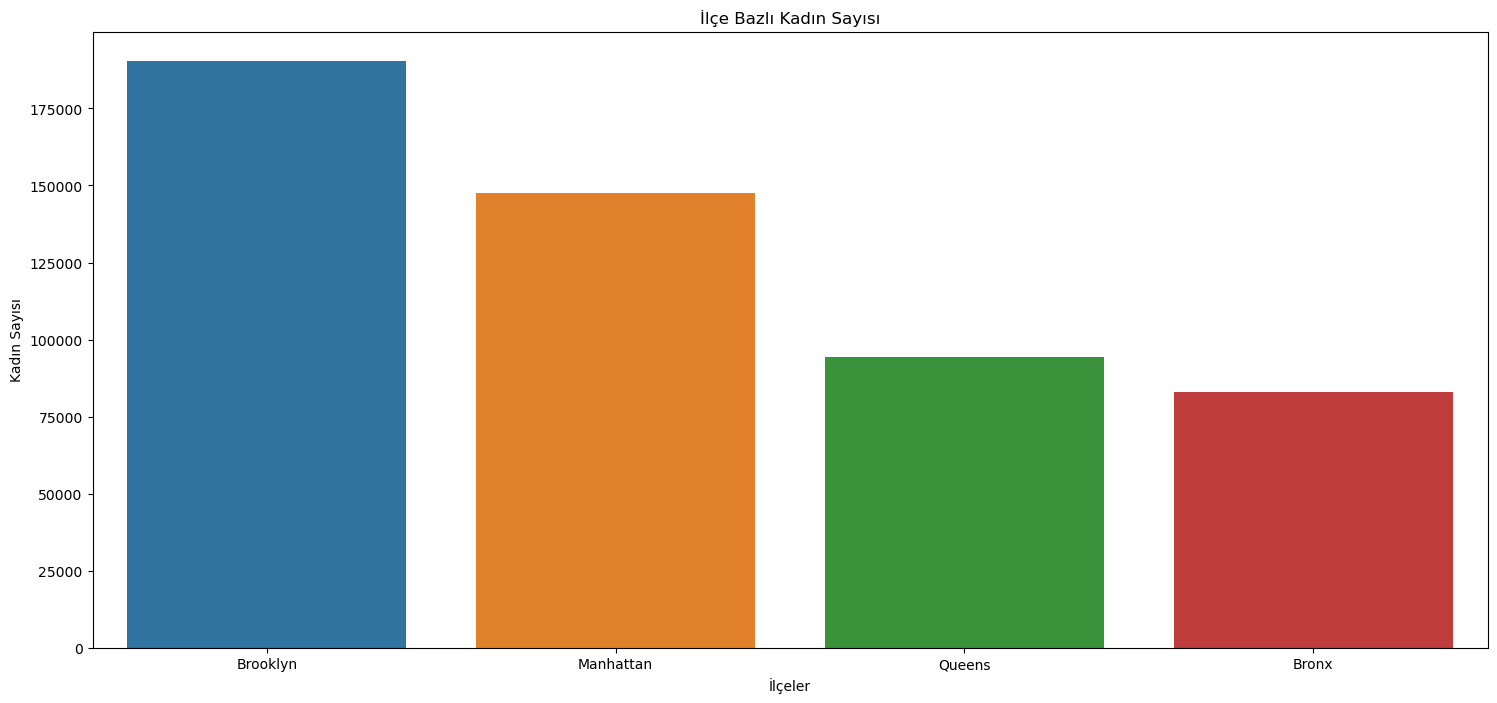

In [274]:
plt.figure(figsize=[18,8])
sns.barplot(x=borough_count.index, y=borough_count.values)
plt.title("İlçe Bazlı Kadın Sayısı")
plt.xlabel("İlçeler")
plt.ylabel("Kadın Sayısı");

In [293]:
Brooklyn_count = len(new_mta_df.loc[new_mta_df["borough"]=="Brooklyn"]["station_complex"].unique())

In [294]:
Manhattan_count = len(new_mta_df.loc[new_mta_df["borough"]=="Manhattan"]["station_complex"].unique())

In [295]:
Queens_count = len(new_mta_df.loc[new_mta_df["borough"]=="Queens"]["station_complex"].unique())

In [296]:
Bronx_count = len(new_mta_df.loc[new_mta_df["borough"]=="Bronx"]["station_complex"].unique())

In [303]:
liste = []
liste.append([Brooklyn_count,Manhattan_count,Queens_count,Bronx_count])

In [321]:
data = {"Brooklyn":Brooklyn_count,"Manhattan":Manhattan_count,"Queens":Queens_count,"Bronx":Bronx_count}
data = pd.Series(data)

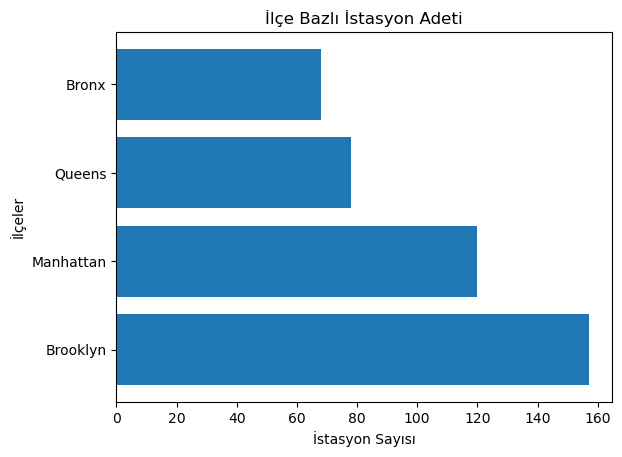

In [322]:
plt.barh(data.index, data.values);
plt.title("İlçe Bazlı İstasyon Adeti")
plt.xlabel("İstasyon Sayısı")
plt.ylabel("İlçeler");

In [323]:
Brooklyn_count

157

In [326]:
borough_count

Brooklyn     190363
Manhattan    147579
Queens        94198
Bronx         83066
Name: borough, dtype: int64

In [331]:
b_c= borough_count["Brooklyn"]/Brooklyn_count

In [332]:
m_c=borough_count["Manhattan"]/Manhattan_count

In [335]:
q_c=borough_count["Queens"]/Queens_count

In [336]:
br_c=borough_count["Bronx"]/Bronx_count

In [337]:
s = pd.Series({"b_c":b_c,"m_c":m_c,"q_c":q_c,"br_c":br_c})

In [338]:
s.values

array([1212.50318471, 1229.825     , 1207.66666667, 1221.55882353])

([<matplotlib.patches.Wedge at 0x21f2ff1f460>,
 [Text(0.4257349129715045, 0.422788107539871, 'Brooklyn'),
  Text(-0.42458299958729595, 0.42394489790709144, 'Manhattan'),
  Text(-0.42347512403016446, -0.4250515490239234, 'Queens'),
  Text(0.4232586176098783, -0.42526714265150417, 'Bronx')],
 [Text(0.886947735357301, 0.8808085573747313, '24.9%'),
  Text(-0.8845479158068665, 0.8832185373064405, '25.2%'),
  Text(-0.8822398417295094, -0.8855240604665071, '24.8%'),
  Text(0.8817887866872465, -0.8859732138573004, '25.1%')])

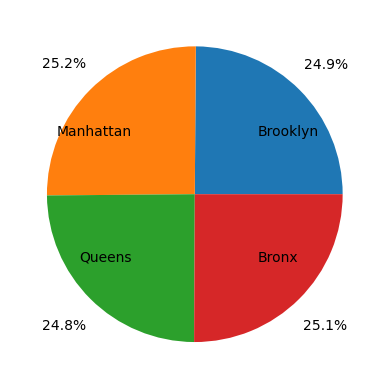

In [344]:
fig, ax = plt.subplots()

ax.pie(s.values,labels=['Brooklyn','Manhattan','Queens','Bronx'],autopct='%1.1f%%',pctdistance=1.25, labeldistance=.6)